### Mini_proj_basic_DSCR
1. EDA
    1. 범주형 데이터 gender, oral, tartar 를 0과 1로 라벨링
    2. object형 데이터 변환
2. 훈련 
    1. random_state = 42로 설정
    2. model
        - DecisionTreeClassifier
        - RandomForestClassifier
        - XGBoost
        - LGBMClassifier
        - Logistic Regression
        - Support Vector Machine
    3. 예측 후 confusion_matrix 확인
    4. classification_report 확인
3. 모델 상세
    - DecisionTreeClassifier
        - ㅎㅁㄴ
        
        
        

### EDA

- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
df = pd.read_csv('../../ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [6]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

### 3. 훈련01

### 분류성능평가지표
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)


1. Precision(정밀도)
    - 정밀도란 **모델이 True라고 분류한 것 중에서 실제 True**인 것의 비율입니다. 
    - Positive 정답률, PPV(Positive Predictive Value)라고도 불립니다. 
    - 날씨 예측 모델이 맑다로 예측했는데, 실제 날씨가 맑았는지를 살펴보는 지표라고 할 수 있겠습니다.
2. Recall(재현율)
    - 재현율이란 **실제 True인 것 중에서 모델이 True**라고 예측한 것의 비율입니다. 
    - 통계학에서는 sensitivity으로, 그리고 다른 분야에서는 hit rate라는 용어로도 사용합니다
    - 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표
3. Accuracy(정확도)
    - False를 False라고 예측한 경우
    - 정확도는 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표
    - domain의 편중(bias)
        - 만약 우리가 예측하고자 하는 한달 동안이 특정 기후에 부합하여 비오는 날이 흔치 않다고 생각해보죠. 이 경우에는 해당 data의 domain이 불균형하게되므로 맑은 것을 예측하는 성능은 높지만, 비가 오는 것을 예측하는 성능은 매우 낮을 수 밖에 없습니다. 따라서 이를 보완할 지표가 필요합니다.
4. F1 score
    - F1 score는 Precision과 Recall의 조화평균
    - F1 score는 **데이터 label이 불균형 구조**일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현
    - 산술평균을 이용하는 것보다, 큰 비중이 끼치는 bias가 줄어든다
    

- $Precision =\frac{TP}{TP+FP}=\frac{T를 T로 예측}{T를 T로 예측+F를 T로 예측} $
- $Recall =\frac{TP}{TP+FN}=\frac{T를 T로 예측}{T를 T로 예측+T를 F로 예측} $
- $Accuracy =\frac{TP+TN}{TP+TN+FP+FN}=\frac{T를 T로 예측 + F를 F로 예측}{모든 예측} $
- $F1 score =2*\frac{1}{\frac{1}{Precision}+\frac{1}{Recall}}=2*\frac{Precision*Recall}{Precision+Recall}$
 
reference[분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)

#### DecisionTreeClassifier
[hyperparm](https://github.com/LeeJeaHyuk/python/blob/master/Theory/scikit-learn/DecisionTreeClassifier.md)

- 오류 및 의문점
    1. 2028 fits failed with the following error:
        - min_weight_fraction_leaf == 1.0, must be <= 0.5
        - 0.5보다 작은 값으로 해야 한다? 비율이므로 1을 넘어가면 안되는 것 같다
    2. gridserch에 hyperprarmeter 추가할 때 마다 score값이 줄어듦 (defualt값을 반드시 추가해야 하는 듯)


In [9]:
np.append(0.0, np.arange(0.1, 0.5, 0.1))

array([0. , 0.1, 0.2, 0.3, 0.4])

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()

criterion_list =  ['gini','entropy'] 
splitter_list =  ['best','random']
max_depth_list =  np.arange(2, 15)
min_samples_split_list = np.arange(2, 15)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'criterion' : criterion_list ,
    'splitter'  : splitter_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)
best_params = model.best_params_
best_score = model.best_score_

Fitting 3 folds for each of 10140 candidates, totalling 30420 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_impurity_decrease': array([0. , 0.3, 0.4]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'random_state': [42], 'splitter': ['best', 'random']},
             verbose=1)

best_params :  {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
best_score_ :  0.7450003366776649


### 모듈을 생성하여 best_param을 저장해서 쉽게 다시 불러오기
1. girdcvconv('model_name',,best_params,best_score_) 모델 이름/ 최적 파라미터 / 최적 점수
    - MyModule 폴더 아래의 함수
    - 현재 위치의 modeldata 폴더 생성 후 지정한 모델 이름의 csv파일 생성
    - 날짜 / 최적 점수 / 최적 파라미터 순으로 데이터프레임 생성
2. 

In [1]:
best_params = {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
best_score = 0.7450003366776649

In [2]:
import pandas as pd

from MyModule import girdcvconv as gc

gc.paramsTocsv('DecisionTreeClassifier',best_params,best_score)


In [ ]:
# 생성된 dataframe 확인
df = pd.read_csv('./modeldata/DecisionTreeClassifier.csv')
df

In [1]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

best123 = sp.selectparam('DecisionTreeClassifier',2)
print(best123)

{'best_score': [0.4], 'criterion': ['entropy'], 'max_depth': [8], 'min_impurity_decrease': [0.0], 'min_samples_split': [2], 'min_weight_fraction_leaf': [0.0], 'random_state': [42], 'splitter': ['best']}


dict

In [2]:
#DecisionTreeClassifier 최적의 파라미터
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
model = GridSearchCV(estimator, param_grid=best123, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

NameError: name 'X_train' is not defined

#### RandomForestClassifier



In [17]:
len(y_train)
len(pred)

44553

44553

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_train)
accuracy_score(y_train,pred)
print("*"*10)
pred_test = model.predict(X_test)
accuracy_score(y_test,pred_test)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

RandomForestClassifier()

1.0

**********


0.8301463327049107

ValueError: Found input variables with inconsistent numbers of samples: [11139, 44553]

### XGBoost

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7782565759942545

confusion_matrix : 
 [[5725 1302]
 [1168 2944]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

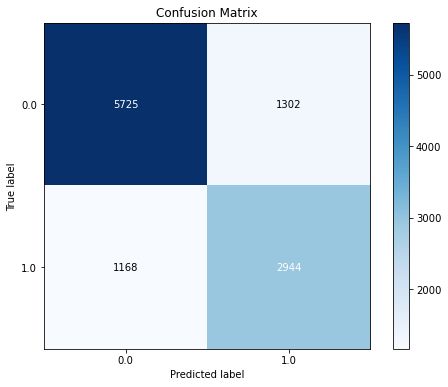

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      7027
         1.0       0.69      0.72      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.77      0.76     11139
weighted avg       0.78      0.78      0.78     11139



In [12]:
#XGBoost1
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

99
0.4427296433494823


0.44272964488104294

array([0.00426044, 0.8394392 , 0.01212047, 0.00586408, 0.00541682,
       0.0057042 , 0.00469223, 0.00379801, 0.00536723, 0.00401257,
       0.00521885, 0.00487424, 0.00482933, 0.00532099, 0.00725594,
       0.00564713, 0.00542283, 0.0054879 , 0.004886  , 0.00651039,
       0.00606318, 0.00651765, 0.01426078, 0.        , 0.0138058 ,
       0.01322366], dtype=float32)

<BarContainer object of 26 artists>

리포트:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      7027
         1.0       0.69      0.72      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.77      0.76     11139
weighted avg       0.78      0.78      0.78     11139



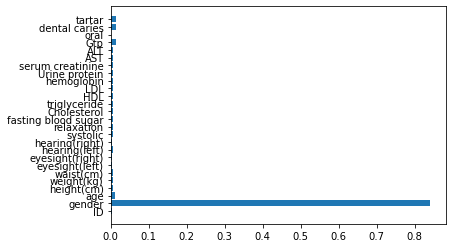

In [14]:
#XGBoost2
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(df.iloc[:,:-1].columns, model.feature_importances_)

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.629699
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.606
[3]	valid_0's binary_logloss: 0.585945
[4]	valid_0's binary_logloss: 0.569196
[5]	valid_0's binary_logloss: 0.555091
[6]	valid_0's binary_logloss: 0.542841
[7]	valid_0's binary_logloss: 0.532537
[8]	valid_0's binary_logloss: 0.523629
[9]	valid_0's binary_logloss: 0.515708
[10]	valid_0's binary_logloss: 0.509227
[11]	valid_0's binary_logloss: 0.503696
[12]	valid_0's binary_logloss: 0.498912
[13]	valid_0's binary_logloss: 0.494652
[14]	valid_0's binary_logloss: 0.490412
[15]	valid_0's binary_logloss: 0.487037
[16]	valid_0's binary_logloss: 0.484325
[17]	valid_0's binary_logloss: 0.481851
[18]	valid_0's binary_logloss: 0.479704
[19]	valid_0's binary_logloss: 0.47807
[20]	valid_0's binary_logloss: 0.476475
[21]	valid_0's binary_logloss: 0.474732
[22]	valid_0's binary_logloss: 0.473286
[23]	valid_0's binary_logloss: 0.472173
[24]	valid_0's binary_logloss: 0

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.762905108178472

confusion_matrix : 
 [[5573 1454]
 [1187 2925]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

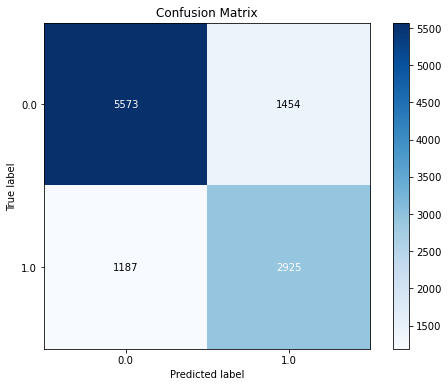

리포트:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      7027
         1.0       0.67      0.71      0.69      4112

    accuracy                           0.76     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.76      0.76     11139



In [18]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

In [171]:
print(model.best_iteration_)
print(model.best_score_)

97
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.4557287150523791)])})


In [172]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.4557287150523791

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

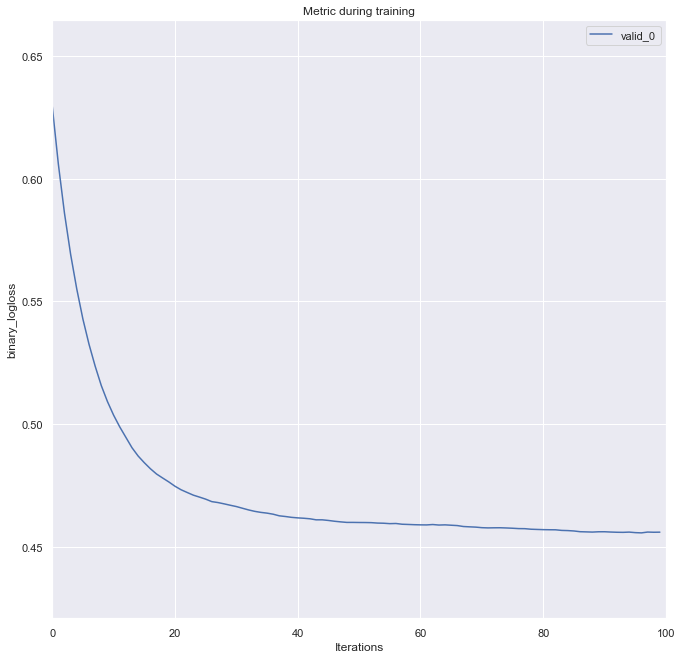

In [173]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

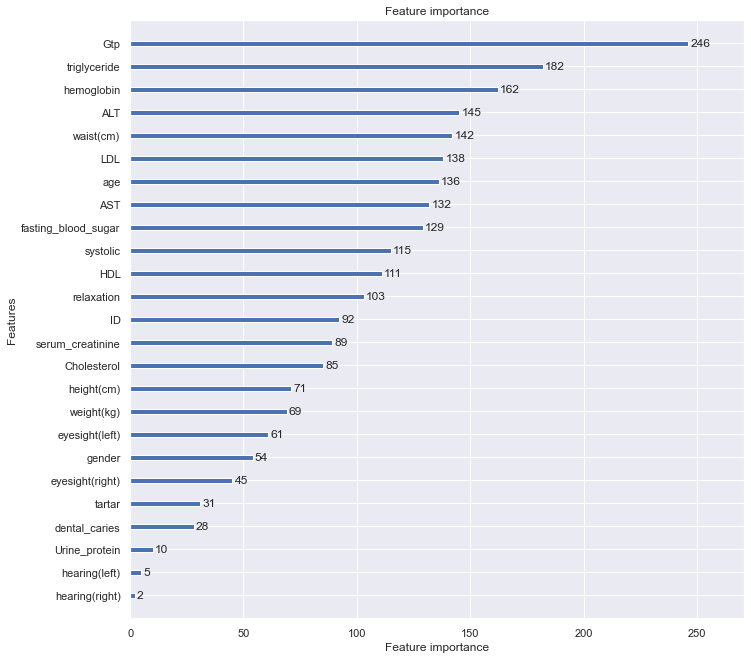

In [174]:
lgb.plot_importance(model)

### Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

import joblib
joblib.dump(model2, 'MINIproject')

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

### Support Vector Machine

In [ ]:
### 모델 - svm ###
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model = svm.SVC()

kernel_list = ['rbf']
C_list = [1]
gamma_list = [0.3]

param = {'kernel' : kernel_list , 'C' : C_list, 'gamma':gamma_list}

model = GridSearchCV(model, param, cv=5,n_jobs=-1)
model.fit(X_train, y_train)

# 결과 확인
print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)


# pred = model.predict(X_test)
# acc = accuracy_score(y_test, pred) 
# acc 

# from sklearn.metrics import confusion_matrix 
# import scikitplot as skplt 

# pred = model.predict(X_test) # 실제 , 예측 
# cm = confusion_matrix(y_test, pred) 
# print('confusion_matrix : \n', cm) 
# skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
# plt.show()


In [6]:
# df01
# df02
# df03

# df04 = pd.concat([df01,df02,df03],axis=1)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(df04.iloc[:,:-1], df04.iloc[:,-1], test_size=0.2, random_state=42)


# # 비만 
# X_train_sersea = X_train.iloc[13:,:-1]
# X_test = X_test
# y_train = y_train.iloc[13:,:-1]
# y_test = y_test